### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Import the data set turtle reviews.
df_rev = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df_rev

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [3]:
# View the metadata.
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Descriptive statistics.
df_rev.describe().round(1)

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.0             2000.0                  2000.0          2000.0   
mean     39.5               48.1                    50.0          1578.0   
std      13.6               23.1                    26.1          1283.2   
min      17.0               12.3                     1.0            25.0   
25%      29.0               30.3                    32.0           772.0   
50%      38.0               47.2                    50.0          1276.0   
75%      49.0               64.0                    73.0          1751.2   
max      72.0              112.3                    99.0          6847.0   

       product  
count   2000.0  
mean    4320.5  
std     3148.9  
min      107.0  
25%     1589.2  
50%     3624.0  
75%     6654.0  
max    11086.0

## 2. Drop columns

In [5]:
# Drop unnecessary columns.
rev_subset = df_rev.drop(columns=['language','platform'])

rev_subset

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 3. Rename columns

In [6]:
# Rename the column headers.

rev_subset.rename(columns = {'gender':'Gender','age':'Age',
                             'remuneration (k£)':'Remuneration',
                             'spending_score (1-100)':'Spending Score',
                             'loyalty_points':'Loyalty Points',
                             'education':'Education','product':'Product Code',
                             'review':'Review',
                             'summary':'Summary'}, inplace = True)

# View column names.
rev_subset

Gender  Age  Remuneration  Spending Score  Loyalty Points Education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      Product Code                                             Review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
...            ...                                                ...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                                Summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.
rev_subset.to_csv('rev_subset.csv', index=False)

In [8]:
# Import new CSV file with Pandas.
df_rev_subset = pd.read_csv('rev_subset.csv')

# View DataFrame.
df_rev_subset

Gender  Age  Remuneration  Spending Score  Loyalty Points Education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      Product Code                                             Review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
...            ...                                                ...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                                Summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 5. Linear regression

### 5a) Spending Score vs loyalty

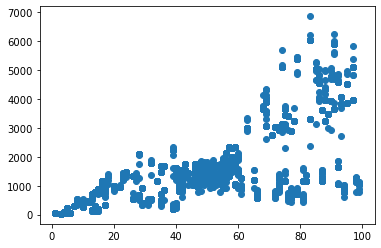

In [9]:
# Independent variable.
x = df_rev_subset['Spending Score']

# Dependent variable.
y = df_rev_subset['Loyalty Points']


# Check for linearity.
plt.scatter(x,y)

In [10]:
# OLS model and summary.
f = 'y ~ x'
model = ols(f, data = df_rev_subset).fit()

# Print the regression table.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        15:11:08   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parameters.
print("Parameters: ", model.params)  

# Extract the standard errors.
print("Standard errors: ", model.bse)   

# Extract the predicted values.
print("Predicted values: ", model.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.061693 * x -75.052663

y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: Spending Score, Length: 2000, dtype: float64

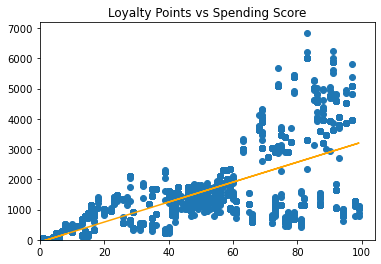

In [13]:
# Plot the graph with a regression line.

import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='orange')

# Create title.
plt.title("Loyalty Points vs Spending Score")

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) Remuneration vs loyalty

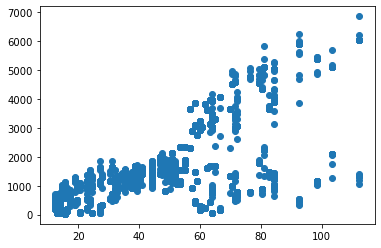

In [14]:
# Independent variable.
x = df_rev_subset['Remuneration']

# Dependent variable.
y = df_rev_subset['Loyalty Points']


# Check for linearity.
plt.scatter(x,y)

In [15]:
# OLS model and summary.
f = 'y ~ x'
model = ols(f, data = df_rev_subset).fit()

# Print the regression table.
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        15:11:08   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Extract the estimated parameters.
print("Parameters: ", model.params)  

# Extract the standard errors.
print("Standard errors: ", model.bse)   

# Extract the predicted values.
print("Predicted values: ", model.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [17]:
# Set the X coefficient and the constant to generate the regression table.
y_pred =  34.187825  * x - 65.686513

y_pred



0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: Remuneration, Length: 2000, dtype: float64

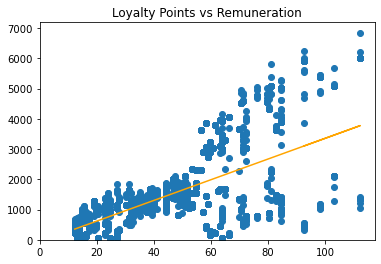

In [18]:
# Plot the graph with a regression line.

import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='orange')

# Create title.
plt.title("Loyalty Points vs Remuneration")

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5c) age vs loyalty

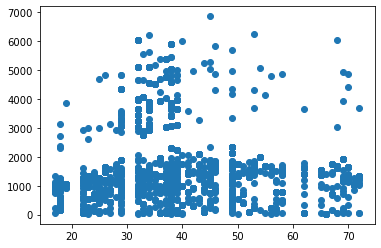

In [19]:
# Independent variable.
x = df_rev_subset['Age']

# Dependent variable.
y = df_rev_subset['Loyalty Points']


# Check for linearity.
plt.scatter(x,y)

In [20]:
# OLS model and summary.
f = 'y ~ x'
model = ols(f, data = df_rev_subset).fit()

# Print the regression table.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 11 Sep 2022   Prob (F-statistic):             0.0577
Time:                        15:11:09   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Extract the estimated parameters.
print("Parameters: ", model.params)  

# Extract the standard errors.
print("Standard errors: ", model.bse)   

# Extract the predicted values.
print("Predicted values: ", model.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.012805 * x + 1736.517739

y_pred


0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: Age, Length: 2000, dtype: float64

In [23]:
# Plot the graph with a regression line.

import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='orange')

# Create title.
plt.title("Loyalty Points vs Age")

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Import new CSV file with Pandas.
df_rev_2 = pd.read_csv('rev_subset.csv')

# View DataFrame.
df_rev_2

Gender  Age  Remuneration  Spending Score  Loyalty Points Education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      Product Code                                             Review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
...            ...                                                ...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                                Summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [26]:
# Drop unnecessary columns.
df2_subset = df_rev_2.drop(columns=['Gender','Age','Loyalty Points','Education','Review','Summary','Product Code'])

# View DataFrame.
df2_subset

Remuneration  Spending Score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

## 2. Plot

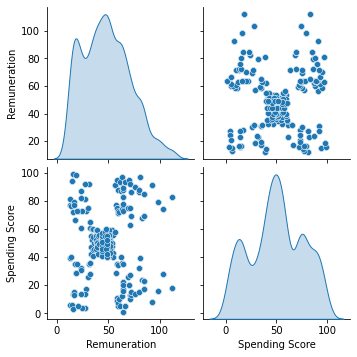

In [27]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='Remuneration', y='Spending Score',
                data=df2_subset)


# Create a pairplot with Seaborn.
x = df2_subset[['Remuneration', 'Spending Score']]

sns.pairplot(df2_subset, vars=x, diag_kind= 'kde')


## 3. Elbow and silhoutte methods

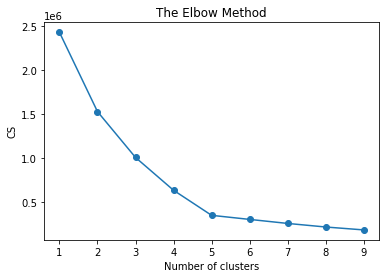

In [28]:
# Determine the number of clusters: Elbow method.
cs = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 10), cs, marker='o')
plt.xticks(range(1, 10))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('CS')
plt.show()

In [29]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.title("The silhouette method")
plt.xlabel("Number of clusters")
plt.ylabel('Sil')
plt.show()

## 4. Evaluate k-means model at different values of *k*

In [30]:
# Model with 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [31]:
# Model with 5 clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [32]:
# Model with 6 clusters.
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [33]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [34]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [35]:
# View the DataFrame.
print(x.head())

   Remuneration  Spending Score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<AxesSubplot:xlabel='Remuneration', ylabel='Spending Score'>

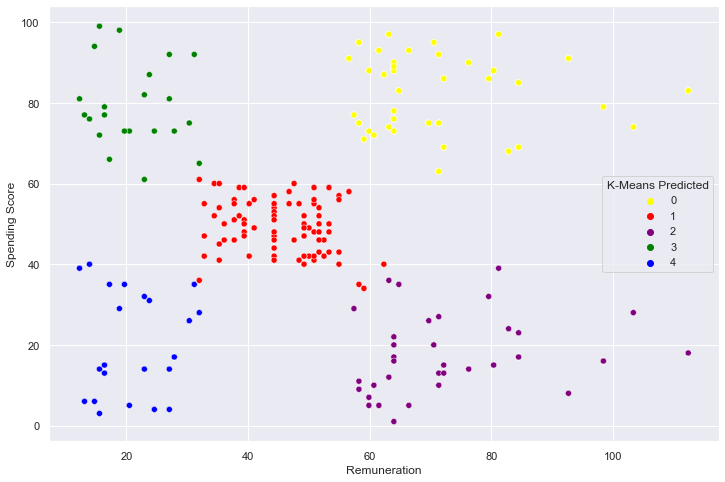

In [36]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='Remuneration' , 
                y = 'Spending Score',
                data=x , hue='K-Means Predicted',
                palette=['yellow','red','purple', 'green', 'blue'])


# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [37]:
# Install WordCloud.
!pip install WordCloud

In [38]:
# Install nltk.
!pip install nltk

In [39]:
# Install TextBlob.
!pip install textblob

In [40]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [41]:
# Load the data set as df3.
df_rev_3 = pd.read_csv('rev_subset.csv')

# View DataFrame.
df_rev_3

Gender  Age  Remuneration  Spending Score  Loyalty Points Education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      Product Code                                             Review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
...            ...                                                ...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                                Summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [42]:
# Drop unnecessary columns.
df3_subset = df_rev_3.drop(columns=['Gender','Age','Loyalty Points','Education','Remuneration','Spending Score','Product Code'])

# View DataFrame.
df3_subset

Review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                Summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [43]:
# Determine if there are any missing values.
df3_subset.isnull().sum()

Review     0
Summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [44]:
# Review: Change all to lower case and join with a space.
df3_subset['Review'] = df_rev_3['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [45]:
# Summary: Change all to lower case and join with a space.
df3_subset['Summary'] = df_rev_3['Summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [46]:
# Replace all the punctuations in review column.
df3_subset['Review'] = df3_subset['Review'].str.replace('[^\w\s]','')

# View output.
df3_subset['Review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: Review, dtype: object

In [47]:
# Replace all the puncuations in summary column.
df3_subset['Summary'] = df3_subset['Summary'].str.replace('[^\w\s]','')

# View output.
df3_subset['Summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: Summary, dtype: object

### 2c) Drop duplicates in both columns

In [48]:
#  Check for any duplicates Review column

df3_subset.Review.duplicated().sum()

50

In [49]:
#  Check for any duplicates Summarycolumn
df3_subset.Summary.duplicated().sum()

649

In [50]:
# Drop duplicates in both columns.
df3_subset = df3_subset.drop_duplicates()

# View DataFrame.
df3_subset

Review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                Summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

## 3. Tokenise and create wordclouds

In [51]:
# Create new DataFrame (copy DataFrame).
df3_n= df3_subset[['Review', 'Summary']]

# View DataFrame.
df3_n

Review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                Summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

In [52]:
# Apply tokenisation to both columns.
df3_n['tokens R'] = df3_n['Review'].apply(word_tokenize)
df3_n['tokens S'] = df3_n['Summary'].apply(word_tokenize)
df3_n= df3_n.reset_index()


# View DataFrame.
df3_n

index                                             Review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                Summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                               tokens R  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                               tokens S  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  
1957                                       [super, fun]  
1958                                      [great, game]  
1959                                      [four, stars]  
1960                                 [love, this, game]  

[1961 rows x 5 columns]

In [53]:
# Create an empty lost of tokens
all_tokens = []
for i in range(df3_n.shape[0]):
    all_tokens = all_tokens + df3_n['tokens R'][i]

In [54]:
# Review: Create a word cloud.
words = " ".join(Review for Review in df3_n.Review)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 10).generate(words)

In [55]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [56]:
# Create an empty lost of tokens
all_tokens = []
for i in range(df3_n.shape[0]):
    all_tokens = all_tokens + df3_n['tokens S'][i]

In [57]:
# Summary: Create a word cloud.
words = " ".join(review for review in df3_n.Summary)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 10).generate(words)

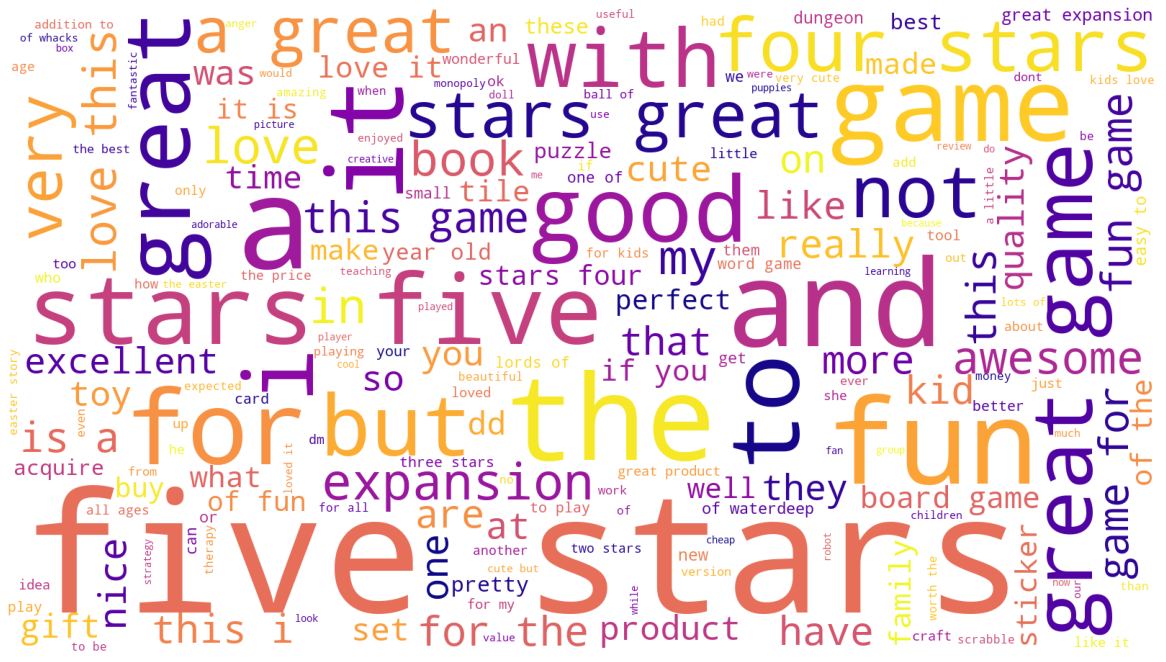

In [58]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [59]:
# Determine the frequency distribution.
freq_dist = FreqDist(all_tokens)
freq_dist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [60]:
# Delete all the alpanum.
tokens1 = [word for word in all_tokens if word.isalnum()]

In [61]:
# Remove all the stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))
# Create a a filtered lsit of tokens without stop words
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]
# Define an empty string variable.
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [62]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
min_font_size = 5).generate(tokens2_string)

In [63]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [64]:
# Determine the 15 most common words.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                        columns=['Word', 'Frequency']).set_index('Word')
# View Results
counts

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [65]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [66]:
# Determine polarity of both columns. 
df3_n['p_Review'] = df3_n['Review'].apply(generate_polarity)
df3_n['p_Summary'] = df3_n['Summary'].apply(generate_polarity)

# View output.
df3_n

index                                             Review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                Summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                               tokens R  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                               tokens S  p_Review  p_Summary  
0     [the, fact, that, 50, of, this, space, is, was... -0.036111   0.150000  
1     [another, worthless, dungeon, masters, screen,...  0.035952  -0.800000  
2                  [pretty, but, also, pretty, useless]  0.116640   0.000000  
3                                         [five, stars]  0.578788   0.000000  
4                                         [money, trap] -0.316667   0.000000  
...                                                 ...       ...        ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  0.168750   0.200000  
1957                                       [super, fun]  0.158333   0.316667  
1958                                      [great, game]  0.200000   0.200000  
1959                                      [four, stars] -0.050000   0.000000  
1960                                 [love, this, game] -0.095833   0.050000  

[1961 rows x 7 columns]

Text(0.5, 1.0, 'Histogram of sentiment score polarity for Reviews')

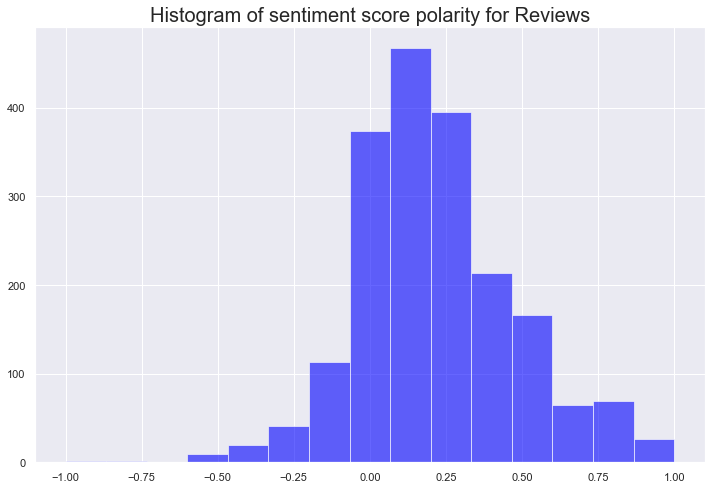

In [67]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15
plt.hist(df3_n['p_Review'], num_bins, facecolor='blue', alpha=0.6)
plt.title('Histogram of sentiment score polarity for Reviews', fontsize=20)

In [68]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15
plt.hist(df3_n['p_Summary'], num_bins, facecolor='blue', alpha=0.6)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)

Text(0.5, 1.0, 'Histogram of sentiment score polarity for Summary')

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [69]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment_review = df3_n.nsmallest(20, 'p_Review')

# Keep necessary columns.
negative_sentiment_review_sub = negative_sentiment_review[['Review',  'p_Review']]

# Set properties.
negative_sentiment_review_sub.style.set_properties(subset=['Review'], **{'width':'1200px'})


In [70]:
# Top 20 negative summaries.

# Create a DataFrame.
negative_sentiment_review = df3_n.nsmallest(20, 'p_Summary')

# Keep necessary columns.
negative_sentiment_review_sub = negative_sentiment_review[['Summary',  'p_Summary']]

# Set properties.
negative_sentiment_review_sub.style.set_properties(subset=['Summary'], **{'width':'1200px'})


In [71]:
# Top 20 positive reviews.

# Create a DataFrame.
positive_sentiment_review = df3_n.nlargest(20, 'p_Review')

# Keep necessary columns.
positive_sentiment_review_sub = positive_sentiment_review[['Review',  'p_Review']]

# Set properties.
positive_sentiment_review_sub.style.set_properties(subset=['Review'], **{'width':'1200px'})

In [72]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment_summary = df3_n.nlargest(20, 'p_Summary')

# Keep necessary columns.
positive_sentiment_summary_sub = positive_sentiment_summary[['Summary',  'p_Summary']]

# Set properties.
positive_sentiment_summary_sub.style.set_properties(subset=['Summary'], **{'width':'1200px'})
